<IPython.core.display.Javascript object>


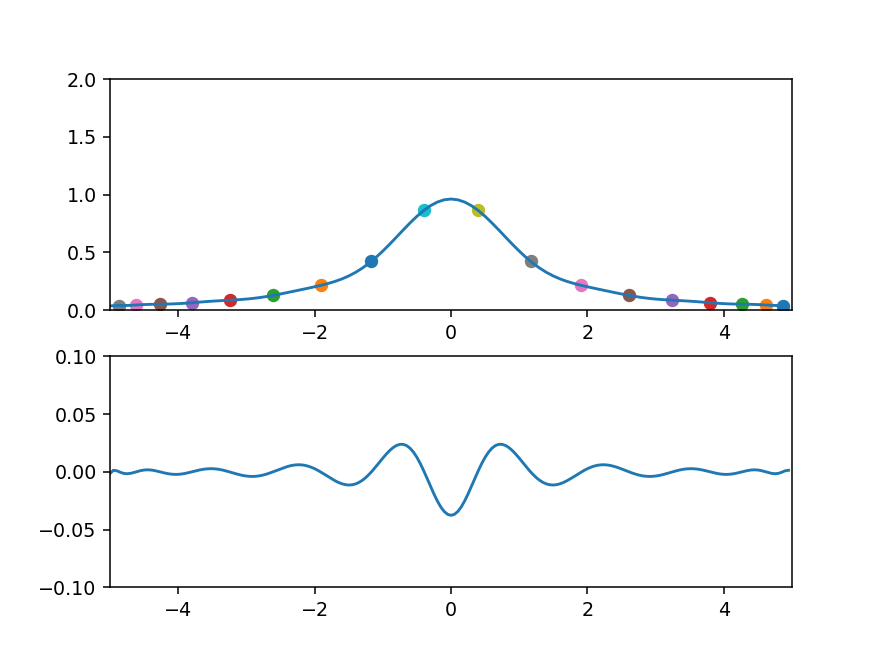

In [48]:
import numpy as np
from matplotlib.pyplot import *

%matplotlib notebook

X = []
Y = []
G = []
T = []
Err = []
X_err = []

a = -5
b = 5
n = 20

for i in range(1, n):
    x = 1 / 2 * (a + b) + 1 / 2 * (b - a)*np.cos((2*i-1)/2/n*np.pi)
    y = 1/(1 + x**2)
    X.append(x)
    Y.append(y)

A = np.copy(Y)

for j in range(1, n):
    
    for i in range(n-2, j-1, -1):
        A[i] = float(A[i] - A[i - 1]) / float(X[i] - X[i - j])

def p(g):
    
    P = A[0]
    t = (g - X[0])
    
    for j in range(1, n-1):
        P = P + t * A[j]
        t = t * (g - X[j])
    return P

subplot(211)
axis([-5, 5, 0, 2])
ln1, = plot(G, T)

for i in range(1, n-1):
    scatter(X[i], Y[i])
    gcf().canvas.draw()

for x_2 in np.arange(-5, 5, 0.1):
    G.append(x_2)
    T.append(p(x_2))
    
    ln1.set_data(G, T)
    gcf().canvas.draw()
#Мажоранта
subplot(212)
axis([-5, 5, -1e-1, 1e-1])
ln2, = plot(X_err, Err)
for x_err in np.arange(-5, 5, 0.05):
    y_err = 1/(1+x_err**2)
    X_err.append(x_err)
    Err.append(p(x_err) - y_err)
    ln2.set_data(X_err, Err)
    gcf().canvas.draw()